In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Loading the datasets in X_train, y_train , X_test, y_test respectively
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

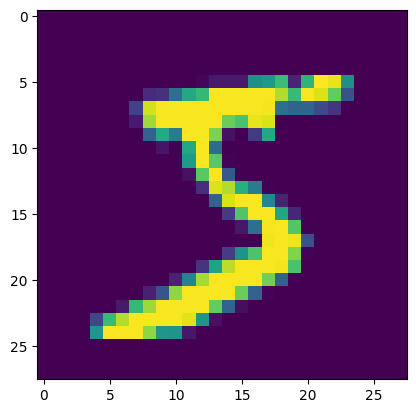

In [5]:
#Displaying the first digit of the dataset
plt.imshow(X_train[0])

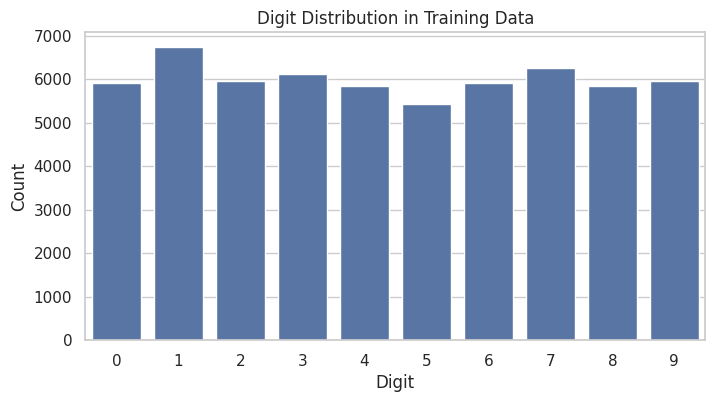

In [6]:
#Label distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title("Digit Distribution in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


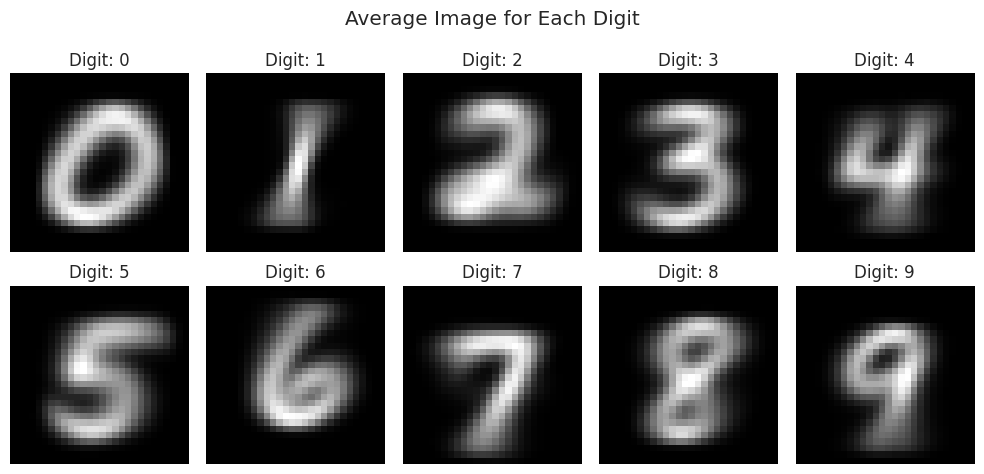

In [7]:
#Average image per digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    avg_img = X_train[y_train == i].mean(axis=0)
    ax = axes[i//5, i%5]
    ax.imshow(avg_img, cmap='gray')
    ax.set_title(f"Digit: {i}")
    ax.axis('off')
plt.suptitle("Average Image for Each Digit")
plt.tight_layout()
plt.show()


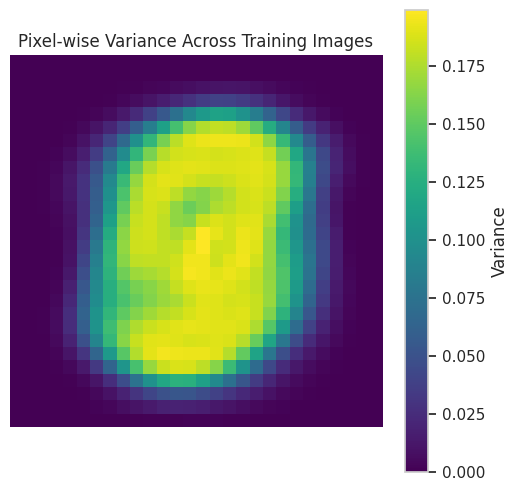

In [22]:
# Calculate pixel-wise variance
pixel_variance = X_train.var(axis=0)

# Plot it as a heatmap over 28x28 image shape
plt.figure(figsize=(6, 6))
plt.imshow(pixel_variance, cmap='viridis')
plt.colorbar(label='Variance')
plt.title("Pixel-wise Variance Across Training Images")
plt.axis('off')
plt.show()

In [9]:
#Converting the pixel values into a particular range
X_train = X_train/255
X_test = X_test/255

In [10]:
import tensorflow as tf

# Creating the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    tf.keras.layers.Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Corrected loss function
              optimizer='adam',                        # Optimizer
              metrics=['accuracy'])                   # Added metrics

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=25, validation_split = 0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8674 - loss: 0.4721 - val_accuracy: 0.9540 - val_loss: 0.1577
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9599 - loss: 0.1401 - val_accuracy: 0.9614 - val_loss: 0.1252
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9754 - loss: 0.0863 - val_accuracy: 0.9695 - val_loss: 0.1049
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0617 - val_accuracy: 0.9704 - val_loss: 0.0973
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9869 - loss: 0.0455 - val_accuracy: 0.9743 - val_loss: 0.0873
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9901 - loss: 0.0338 - val_accuracy: 0.9728 - val_loss: 0.0917
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9734 - val_loss: 0.0923
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9944 - loss: 0.020

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [12]:
y_probability = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
y_pred = y_probability.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766

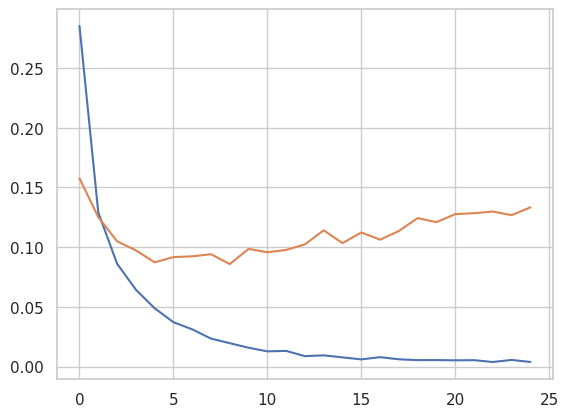

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

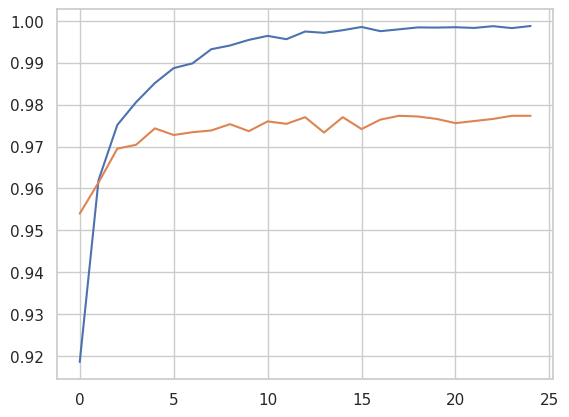

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

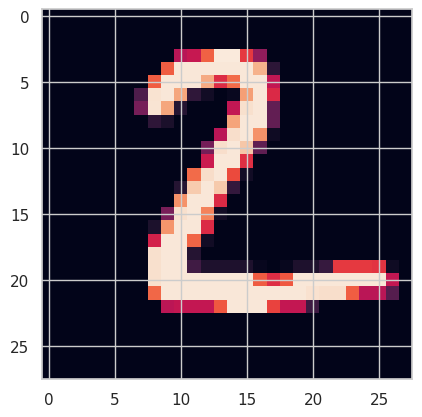

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([2])

In [19]:
model.save("mnist_digit_model.h5")  # Save in HDF5 format